Based on https://github.com/pymc-devs/pymc-resources/blob/main/Rethinking/Chp_04.ipynb

Developed on colab

In [3]:
#pip install pymc3

In [4]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import seaborn as sns

In [5]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

4.1

In [8]:
# Random walk. Here are generated two indviduals (columns) walking 4 steps each of different length with a mean length of 0.
# 2 experiments 
rng.uniform(-1, 1, size=(4, 2))

array([[-0.1535979 , -0.63668678],
       [ 0.98666943,  0.23890415],
       [-0.66261311,  0.02847171],
       [-0.70776874,  0.19232298]])

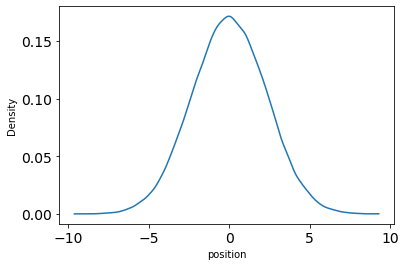

In [17]:
# Repeat for 10,000 individuals: does it look like the normal distribution
# ... this time?
pos = rng.uniform(-1, 1, size=(16, int(1e5))).sum(0)
az.plot_kde(pos)
plt.xlabel("position")
plt.ylabel("Density");

Figure 4.2

In [28]:
step_rng = np.random.default_rng(1234)
step_rng.random()

0.9766997666981422

In [29]:
# Initialize a random generator.
step_rng = np.random.default_rng(1234)

steps = 16         # number of steps to take, each drawn from same distribution.
repetitions = 1000 # i.e. individuals

show_steps = [4, 8, 16]

# Set up a matrix, 17 rows (steps) for 1000 individuals (columns)
x = np.zeros([steps + 1, repetitions])

for i in range(x.shape[1]): # i.e. loop through the columns
    x[1:, i] = np.cumsum(step_rng.uniform(-1, 1, steps))


In [33]:
x.shape[1]

1000

In [32]:
x = np.zeros([steps + 1, repetitions])
x.shape

(17, 1000)

In [23]:
help ( np.random.default_rng)

Help on built-in function default_rng in module numpy.random._generator:

default_rng(...)
    Construct a new Generator with the default BitGenerator (PCG64).
    
    Parameters
    ----------
    seed : {None, int, array_like[ints], SeedSequence, BitGenerator, Generator}, optional
        A seed to initialize the `BitGenerator`. If None, then fresh,
        unpredictable entropy will be pulled from the OS. If an ``int`` or
        ``array_like[ints]`` is passed, then it will be passed to
        `SeedSequence` to derive the initial `BitGenerator` state. One may also
        pass in a `SeedSequence` instance.
        Additionally, when passed a `BitGenerator`, it will be wrapped by
        `Generator`. If passed a `Generator`, it will be returned unaltered.
    
    Returns
    -------
    Generator
        The initialized generator object.
    
    Notes
    -----
    If ``seed`` is not a `BitGenerator` or a `Generator`, a new `BitGenerator`
    is instantiated. This function does n